In [97]:
import os
import pandas as pd
%matplotlib inline

In [98]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [99]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [100]:
type(api_key)

str

In [200]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [235]:
# Fetch the Bitcoin news articles
bitcoin_news_articles = newsapi.get_everything(q="bitcoin", language="en")
type(bitcoin_news_articles)

dict

In [236]:
# Print total articles
print(f"Total articles about bitcoin: {bitcoin_news_articles['totalResults']}")

# Show sample article
bitcoin_news_articles["articles"][2]
    
# Getting all articles together      
bitcoin_contents = []
for article in bitcoin_news_articles['articles']:
      if article['content']:
          bitcoin_contents.append(article['content'])
    
print(bitcoin_contents)

Total articles about bitcoin: 4288
['Less than two miles from Icelands Reykjavik airport sits a nondescript metal building as monolithic and drab as a commercial poultry barn. Theres a deafening racket inside, too, but it doesnt come from clucking chickens. Instead, tens of thousands of whirring… [+3426 chars]', "At least that's the idea. While it's not as intensive as mining Bitcoin, running a full node still requires a lot of computing power. In fact, HTC recommends only using the feature while the phone is connected to WiFi and plugged into its power adapter. The c… [+2014 chars]", 'High school students in France may be among the first people in the world to actually understand how cryptocurrency works. \r\nThe Next Web reports that the French education ministry, Le Ministère de lÉducation Nationale, will integrate cryptocurrency into its … [+1439 chars]', "TL;DR: The in-depth Complete Blockchain and Ethereum Programmer bundle is on sale for just $24 with the code 20LEARN20.\r\nWhen

In [202]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()
bitcoin_df.shape

(19, 5)

In [203]:
bitcoin_df.head()

,compound,negative,neutral,positive,text
0,-0.1531,0.039,0.961,0.000,Less than two miles from Icelands Reykjavik ai...
1,0.2263,0.000,0.960,0.040,At least that's the idea. While it's not as in...
2,0.0000,0.000,1.000,0.000,High school students in France may be among th...
3,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...
4,0.5070,0.000,0.931,0.069,Our robot colleague Satoshi Nakaboto writes ab...


In [204]:
bitcoin_df.describe()

,compound,negative,neutral,positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.414700,0.004789,0.931842,0.063368
std,0.249029,0.014509,0.034862,0.035556
min,-0.153100,0.000000,0.857000,0.000000
25%,0.333350,0.000000,0.927000,0.062500
50%,0.507000,0.000000,0.932000,0.068000
75%,0.516850,0.000000,0.937000,0.070500
max,0.816600,0.052000,1.000000,0.143000


# Ethereum

In [237]:
# Fetch the Ethereum news articles
ethereum_news_articles = newsapi.get_everything(q="ethereum", language="en")
type(ethereum_news_articles)

dict

In [238]:
# Print total articles
print(f"Total articles about ethereum: {ethereum_news_articles['totalResults']}")

# Show sample article
ethereum_news_articles["articles"][0]

Total articles about ethereum: 918


{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Miller Kern',
 'title': 'Debunking Blockchain once and for all',
 'description': "TL;DR: The in-depth Complete Blockchain and Ethereum Programmer bundle is on sale for just $24 with the code 20LEARN20. When it comes to Bitcoin, you get the gist: Cryptocurrency is on the rise right now, it's a worthy investment, and it when it comes to top …",
 'url': 'https://mashable.com/shopping/oct-20-blockchain-and-ethereum-programmer-online-courses/',
 'urlToImage': 'https://mondrian.mashable.com/2019%252F10%252F20%252F20%252Fd451f6dc63634e7ebc1a6884f0de511f.0108b.jpg%252F1200x630.jpg?signature=wXr1QUIZY8rWVXkvW6qxTgQk24E=',
 'publishedAt': '2019-10-20T09:00:00Z',
 'content': "TL;DR: The in-depth Complete Blockchain and Ethereum Programmer bundle is on sale for just $24 with the code 20LEARN20.\r\nWhen it comes to Bitcoin, you get the gist: Cryptocurrency is on the rise right now, it's a worthy investment, and it when it comes to top… 

In [239]:
# Getting all articles together      
ethereum_contents = []
for article in bitcoin_news_articles['articles']:
      if article['content']:
            ethereum_contents.append(article['content'])
    
print(ethereum_contents)

['Less than two miles from Icelands Reykjavik airport sits a nondescript metal building as monolithic and drab as a commercial poultry barn. Theres a deafening racket inside, too, but it doesnt come from clucking chickens. Instead, tens of thousands of whirring… [+3426 chars]', "At least that's the idea. While it's not as intensive as mining Bitcoin, running a full node still requires a lot of computing power. In fact, HTC recommends only using the feature while the phone is connected to WiFi and plugged into its power adapter. The c… [+2014 chars]", 'High school students in France may be among the first people in the world to actually understand how cryptocurrency works. \r\nThe Next Web reports that the French education ministry, Le Ministère de lÉducation Nationale, will integrate cryptocurrency into its … [+1439 chars]', "TL;DR: The in-depth Complete Blockchain and Ethereum Programmer bundle is on sale for just $24 with the code 20LEARN20.\r\nWhen it comes to Bitcoin, you get the g

In [217]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.shape

(20, 5)

In [218]:
ethereum_df.head()

,compound,negative,neutral,positive,text
0,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...
1,0.6249,0.000,0.900,0.100,Disrupt Berlin is right around the corner. And...
2,0.2263,0.000,0.960,0.040,At least that's the idea. While it's not as in...
3,0.4601,0.000,0.915,0.085,"he plaBy now, you should almost certainly know..."
4,-0.3089,0.055,0.945,0.000,Blockchain has been picking up the pace since ...


In [219]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.252160,0.016100,0.928600,0.055350
std,0.338877,0.029755,0.058029,0.047744
min,-0.440400,0.000000,0.738000,0.000000
25%,0.000000,0.000000,0.913000,0.000000
50%,0.345350,0.000000,0.937500,0.054500
75%,0.464250,0.010500,0.952750,0.087000
max,0.690800,0.090000,1.000000,0.173000


# Questions and Answers:

Q: Which coin had the highest mean positive score?

A: Bitcoin has a little more than Ethereum but not a lot 

Q: Which coin had the highest compound score?

A: Bitcoin has the highest compound score

Q. Which coin had the highest positive score?

A: Ethereum has the highest positive score

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [220]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

# Bitcoin tokenization

In [133]:
content = bitcoin_news_articles['articles'][1]['content']

words = word_tokenize(content)
content

'The Exodus 1 has a little brother, HTC announced earlier today the Exodus 1s. After launching its first-ever blockchain smartphone late last year, HTC promised several months ago that a sequel will arrive in the second half of 2019.Well, it looks like the Tai… [+1658 chars]'

In [297]:
# Complete the tokenizer function
from string import punctuation
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 
import re

def tokenizer(text):
    
    regex = re.compile("[^a-zA-Z ]")
    clean_text = regex.sub('', text)

    
    # Create a list of the words
    words = word_tokenize(clean_text)
        
    # Convert the words to lowercase
    words = [x.lower() for x in words]
    
    # Remove the punctuation
    exclude = set(string.punctuation)

    for i in range(len(words)):
        s = ''.join(ch for ch in words[i] if ch not in exclude)
        words[i] = s
        
           
    # Remove the stop words
    sw_addon = {'s', 'c...', ',','.', 'char', 'have', 'had', 'has', 'fucking'}
    words = [word.lower() for word in words if word.lower() not in sw.union(sw_addon)]
           
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    tokens = words
    
    return tokens

In [298]:
# Create a new tokens column for bitcoin
bitcoin_df['tokens'] = bitcoin_df['text'].apply(tokenizer) 

In [299]:
bitcoin_df.head()

,compound,negative,neutral,positive,text,tokens
0,-0.1531,0.039,0.961,0.000,Less than two miles from Icelands Reykjavik ai...,"[le, two, mile, iceland, reykjavik, airport, s..."
1,0.2263,0.000,0.960,0.040,At least that's the idea. While it's not as in...,"[least, thats, idea, intensive, mining, bitcoi..."
2,0.0000,0.000,1.000,0.000,High school students in France may be among th...,"[high, school, student, france, may, among, fi..."
3,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...,"[tldr, indepth, complete, blockchain, ethereum..."
4,0.5070,0.000,0.931,0.069,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."


# Ethereum tokenization

In [300]:
# Create a new tokens column for ethereum
# ethereum_df['tokens'] = ethereum_df.text.apply(tokenizer) 
ethereum_df['tokens'] = ethereum_df['text'].apply(tokenizer) 

In [301]:
ethereum_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.4404,0.000,0.941,0.059,TL;DR: The in-depth Complete Blockchain and Et...,"[tldr, indepth, complete, blockchain, ethereum..."
1,0.6249,0.000,0.900,0.100,Disrupt Berlin is right around the corner. And...,"[disrupt, berlin, right, around, corner, plent..."
2,0.2263,0.000,0.960,0.040,At least that's the idea. While it's not as in...,"[least, thats, idea, intensive, mining, bitcoi..."
3,0.4601,0.000,0.915,0.085,"he plaBy now, you should almost certainly know...","[plaby, almost, certainly, know, ethereum, eth..."
4,-0.3089,0.055,0.945,0.000,Blockchain has been picking up the pace since ...,"[blockchain, picking, pace, since, inception, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [302]:
from collections import Counter
from nltk import ngrams

In [303]:
# Generate the Bitcoin N-grams where N=2
big_string = ' '.join(bitcoin_df['text'])
processed = tokenizer(big_string)
bigrams = ngrams(processed, n=2)
Counter(bigrams).most_common(10)

[(('satoshi', 'nakaboto'), 26),
 (('char', 'robot'), 13),
 (('robot', 'colleague'), 13),
 (('colleague', 'satoshi'), 13),
 (('nakaboto', 'writes'), 13),
 (('writes', 'bitcoin'), 13),
 (('every', 'daywelcome'), 13),
 (('daywelcome', 'another'), 13),
 (('another', 'edition'), 13),
 (('edition', 'bitcoin'), 13)]

In [304]:
# Generate the Ethereum N-grams where N=2
big_string = ' '.join(ethereum_df['text'])
processed = tokenizer(big_string)
bigrams = ngrams(processed, n=2)
Counter(bigrams).most_common(10)

[(('complete', 'blockchain'), 3),
 (('blockchain', 'ethereum'), 3),
 (('ethereum', 'programmer'), 3),
 (('programmer', 'bundle'), 3),
 (('dark', 'mode'), 3),
 (('platform', 'would'), 2),
 (('digital', 'currency'), 2),
 (('given', 'goahead'), 2),
 (('goahead', 'country'), 2),
 (('royal', 'bank'), 2)]

In [305]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [306]:
# Get the top 10 words for Bitcoin
big_string = ' '.join(bitcoin_df['text'])
processed = tokenizer(big_string)
token_count(processed)

[('bitcoin', 44),
 ('satoshi', 26),
 ('nakaboto', 26),
 ('char', 19),
 ('robot', 13),
 ('colleague', 13),
 ('writes', 13),
 ('every', 13),
 ('daywelcome', 13),
 ('another', 13)]

In [307]:
# Get the top 10 words for Ethereum
big_string = ' '.join(ethereum_df['text'])
processed = tokenizer(big_string)
token_count(processed)

[('char', 20),
 ('cryptocurrency', 12),
 ('bitcoin', 7),
 ('blockchain', 6),
 ('ethereum', 6),
 ('bank', 5),
 ('bundle', 4),
 ('company', 4),
 ('dark', 4),
 ('time', 4)]

# Word Clouds

In [308]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [309]:
type(content)
type(bitcoin_contents)

list

In [310]:
# Combination of list of strings
def process_text(corpus): 
    entire_string = ' '.join(corpus)
    return entire_string

In [311]:
bitcoin_all_content = process_text(bitcoin_contents)
ethereum_all_content = process_text(ethereum_contents)

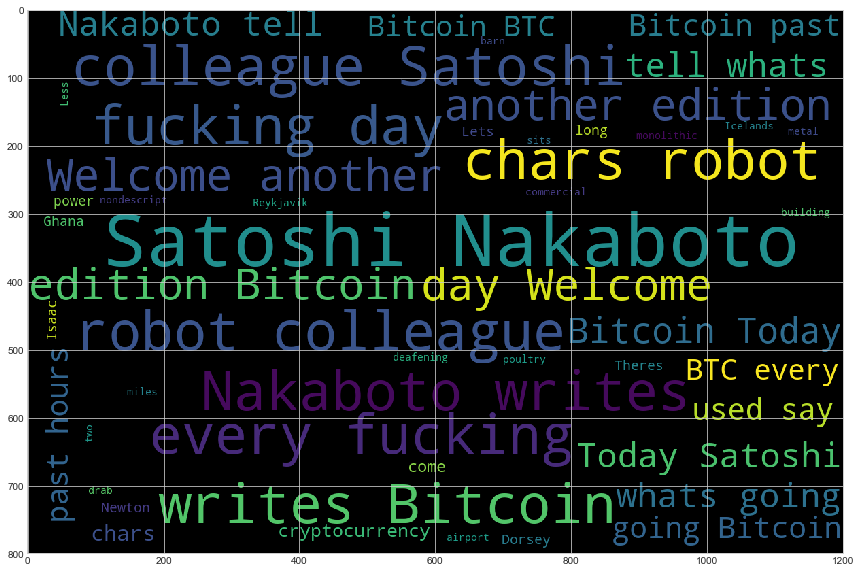

In [312]:
# Generate the bitcoin word cloud
wc = WordCloud(width=1200, height=800, max_words=50).generate(bitcoin_all_content)
plt.imshow(wc)

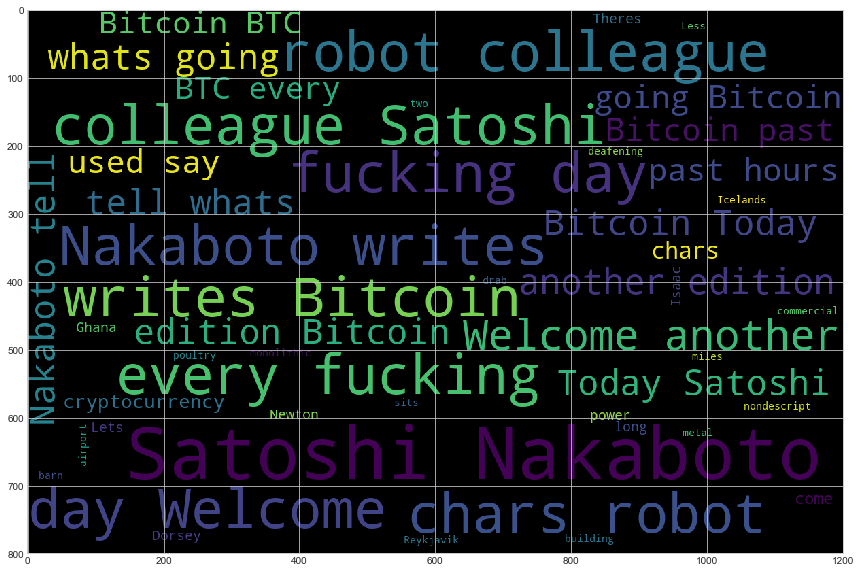

In [313]:
# Generate the ethereum word cloud
wc = WordCloud(width=1200, height=800, max_words=50).generate(ethereum_all_content)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [314]:
import spacy
from spacy import displacy

In [96]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [ ]:
# Concatenate all of the bitcoin text together
bitcoin_all_content = ' '.join(bitcoin_df['text'])
bitcoin_all_content

In [283]:
# Run the NER processor
bitcoin_doc = nlp(bitcoin_all_content)

# Add title
bitcoin_doc.user_data['title'] = 'Bitcoin NER'

displacy.render(bitcoin_doc, style='ent')

In [284]:
#List all of the entities
for ent in bitcoin_doc.ents:
    print (ent.text, ent.label_)

---

## Ethereum NER

In [281]:
# Concatenate all of the bitcoin text together
ethereum_all_content = ' '.join(ethereum_df['text'])
ethereum_all_content

In [35]:
# Run the NER processor
ethereum_doc = nlp(ethereum_all_content)

# Add title
ethereum_doc.user_data['title'] = 'Ethereum NER'

displacy.render(ethereum_doc, style='ent')

In [282]:
#List all of the entities
for ent in ethereum_doc.ents:
    print (ent.text, ent.label_)